# ¡Hola Ignacio! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

----

Primero importamos las librerias básicas que usaremos para el análisis, creamos nuestro DF y vemos la info que contiene

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/datasets/games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1. Se reemplazan los nombres de las columnas a minusculas para no tener que hacer diferencia entre miusculas y mayusculas, y lo comprobamos. 

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Aquí convertimos los datos:

- platform a category, al usar 'category' límitamos los valores, las agrupaciones son más fáciles y finalmente ahorra memoria.
- genre a 'category'
- rating a 'category'
- user_score aparece como object porque mezcla números y valores como 'tbd', hay que limpiar ('tbd'a 'NaN') y luego convertir a float.
- year_of_release aparece como float64, pero en realidad son años → conviértelo a Int64 (entero que admite NaN).

In [4]:
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')

df['year_of_release'] = df['year_of_release'].astype('Int64')

df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(3), float64(6), object(1)
memory usage: 1.1+ MB


Creamos una nueva columna llamada 'total_sales' 

In [6]:
df['total_sales'] = ( df['na_sales'] + 
                      df['eu_sales'] + 
                      df['jp_sales'] +
                      df['other_sales']
    
)

Juegos lanzados por año desde 1980 hasta 2016 

In [7]:
games_per_year =df['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


graficamos

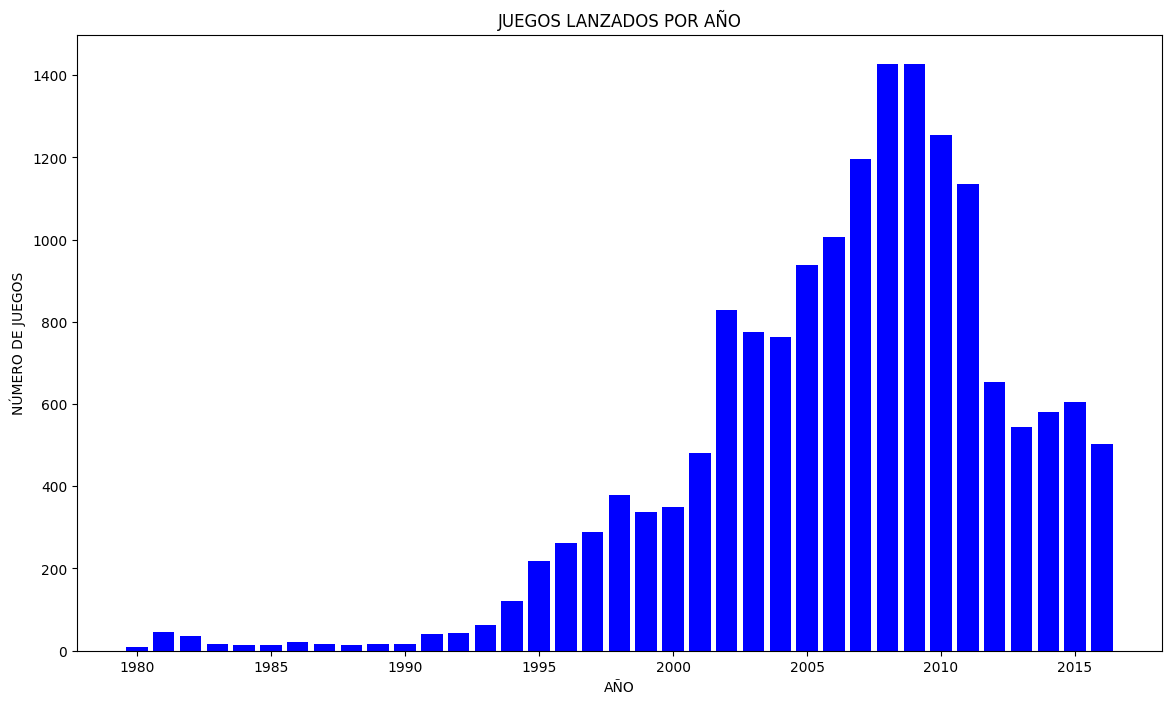

In [8]:
import matplotlib.pyplot as plt

years = list(range(1980, 2017))
games_count = [9, 46, 36, 17, 14, 14, 21, 16, 15, 17, 16, 41, 43, 62, 121, 219,
               263, 289, 379, 338, 350, 482, 829, 775, 762, 939, 1006, 1197, 
               1427, 1426, 1255, 1136, 653, 544, 581, 606, 502]

plt.figure(figsize=(14,8))
plt.bar(years, games_count,color='blue')
plt.title('JUEGOS LANZADOS POR AÑO')
plt.xlabel('AÑO')
plt.ylabel('NÚMERO DE JUEGOS')
plt.show()

Diferencia de ventas entre platafromas:

In [9]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [10]:
top_platforms = platform_sales.head(10).index
print("Top 10 plataformas:", list(top_platforms))


Top 10 plataformas: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


Aquí, filtramos y nos quedamos solo con los juegos que son top.
Agrupamos por año de lanzamiento y plataforma, sumamos, ponemos el nombre de las plataforma como columnas.


In [11]:
df_top = df[df['platform'].isin(top_platforms)]
df_top_grouped = (
    df_top.groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack()
    .fillna(0)
)
print(df_top_grouped.columns)

CategoricalIndex(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X360', 'XB', 'XOne'],
                 categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', ...], ordered=False, name='platform', dtype='category')


In [12]:
print(df_top['platform'].unique())

['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PC', 'PSP']
Categories (10, object): ['Wii', 'DS', 'X360', 'PS3', ..., 'PS4', 'PS', 'PC', 'PSP']


graficamos, Aquí podemos ver cómo cada plataforma tiene su ciclo de vida: arranca, crece, llega a un pico y luego desaparece.

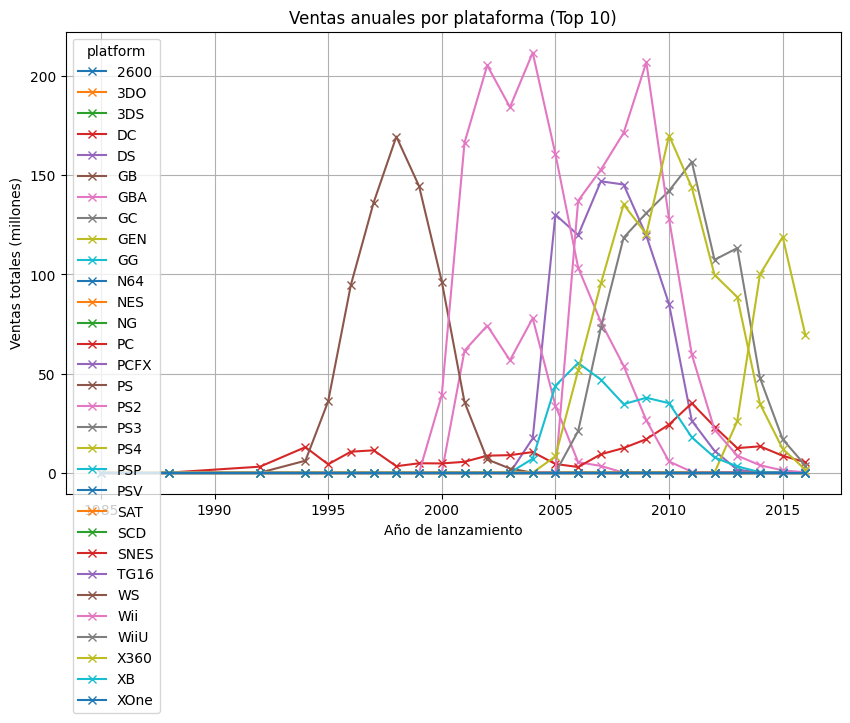

In [13]:
df_top_grouped.plot(kind='line', marker='x', figsize=(10,6))
plt.title("Ventas anuales por plataforma (Top 10)")
plt.ylabel("Ventas totales (millones)")
plt.xlabel("Año de lanzamiento")
plt.grid(True)
plt.show()

Para responder la parte de “¿Cuánto tardan en aparecer y desaparecer?” calculamos el primer año y último año con ventas por plataforma:

In [14]:
df_top_grouped_filtered = df_top_grouped[top_platforms]

lifespan = df_top_grouped_filtered.apply(lambda x: (x[x>0].index.min(), x[x>0].index.max()))
print(lifespan)

platform   PS2  X360   PS3   Wii    DS    PS   GBA   PS4   PSP    PC
0         2000  2005  2006  2006  1985  1994  2000  2013  2004  1985
1         2011  2016  2016  2016  2013  2003  2007  2016  2015  2016


## Diagrama de caja de ventas globales por plataforma

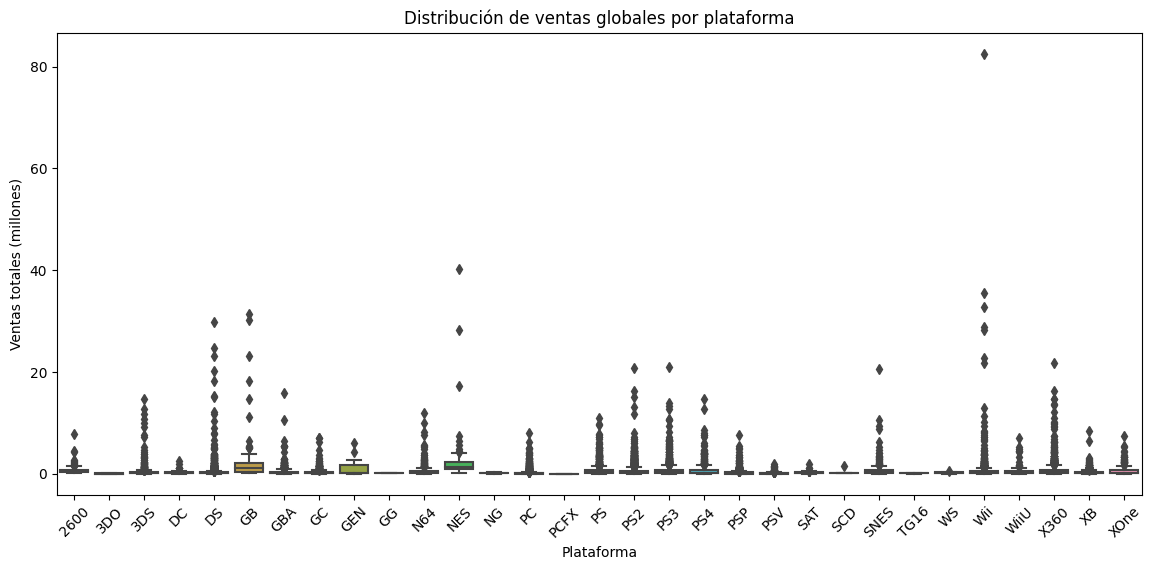

In [15]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title("Distribución de ventas globales por plataforma")
plt.ylabel("Ventas totales (millones)")
plt.xlabel("Plataforma")
plt.xticks(rotation=45)
plt.show()

Las cajas muestran el rango intercuartílico, los medianos y los outliers.
Diferencias significativas aparecen cuando la mediana o los rangos son muy distintos entre plataformas.
Las plataformas con mayor dispersión y medianas altas indican ventas promedio más altas y potencialmente más rentables.


# Correlación entre reseñas y ventas 

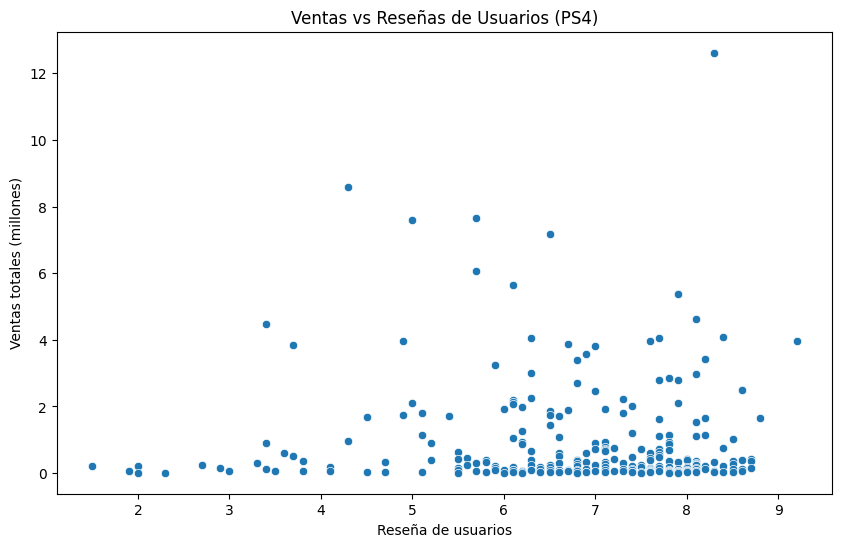

Correlación ventas vs reseñas usuarios: -0.03
Correlación ventas vs reseñas profesionales: 0.41


In [16]:
ps4_games = df[df['platform'] == 'PS4']

plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_games)
plt.title("Ventas vs Reseñas de Usuarios (PS4)")
plt.xlabel("Reseña de usuarios")
plt.ylabel("Ventas totales (millones)")
plt.show()


correlacion_usuarios = ps4_games['user_score'].corr(ps4_games['total_sales'])
correlacion_profesional = ps4_games['critic_score'].corr(ps4_games['total_sales'])
print(f"Correlación ventas vs reseñas usuarios: {correlacion_usuarios:.2f}")
print(f"Correlación ventas vs reseñas profesionales: {correlacion_profesional:.2f}")

Interpretación:

Correlación cercana a 1 → ventas suben cuando la puntuación sube.

Correlación cercana a 0 → las reseñas no influyen mucho en las ventas.

## Mismos juegos en otras plataformas.

In [17]:
top_ps4_games = ps4_games.sort_values('total_sales', ascending=False).head(5)
print("Top juegos PS4:")
print(top_ps4_games[['name', 'total_sales']])



Top juegos PS4:
                              name  total_sales
31       Call of Duty: Black Ops 3        14.63
42              Grand Theft Auto V        12.62
77                         FIFA 16         8.58
87    Star Wars Battlefront (2015)         7.98
92  Call of Duty: Advanced Warfare         7.66


In [18]:
# Buscamos ventas del mismo juego en las otras plataformas
for game in top_ps4_games['name']:
    print(df[df['name'] == game][['platform', 'total_sales']])

     platform  total_sales
31        PS4        14.63
99       XOne         7.39
1049     X360         1.70
1062      PS3         1.69
6463       PC         0.26
     platform  total_sales
16        PS3        21.05
23       X360        16.27
42        PS4        12.62
165      XOne         5.47
1730       PC         1.17
     platform  total_sales
77        PS4         8.58
417      XOne         3.25
552       PS3         2.70
1182     X360         1.57
7575       PC         0.20
     platform  total_sales
87        PS4         7.98
342      XOne         3.66
3666       PC         0.55
     platform  total_sales
92        PS4         7.66
179      XOne         5.26
255       PS3         4.36
263      X360         4.28
4736       PC         0.41


## Distribución de juegos por género

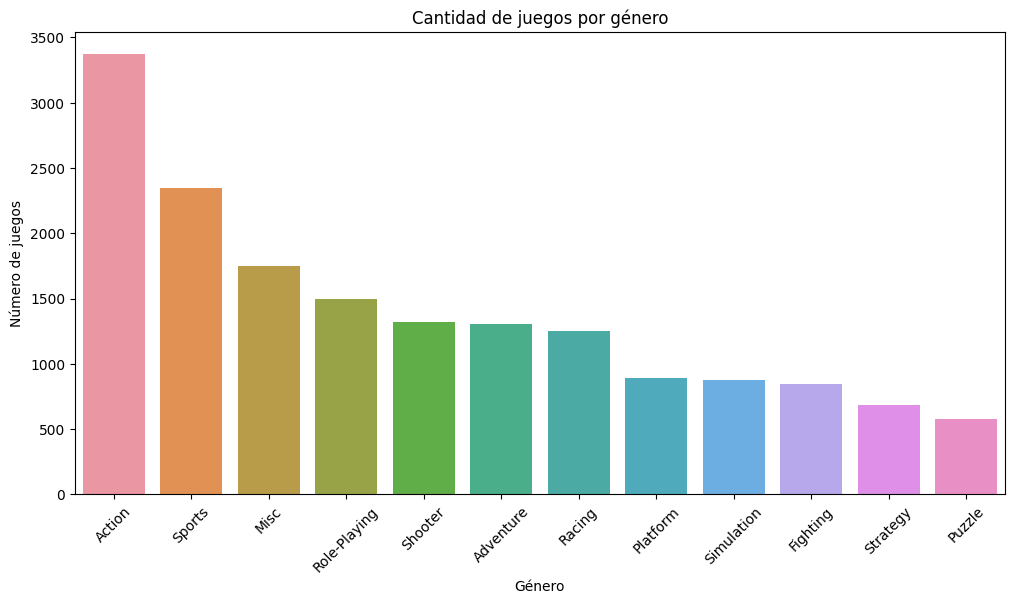

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.title("Cantidad de juegos por género")
plt.xlabel("Género")
plt.ylabel("Número de juegos")
plt.xticks(rotation=45)
plt.show()

# Promedio de ventas por género 

In [20]:
avg_sales_genre = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(avg_sales_genre)

genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
Name: total_sales, dtype: float64


# Top plataformas por región

In [21]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    print(f"\n=== {region} ===")
    
    
    top_platforms_region = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print("Top 5 plataformas:")
    print(top_platforms_region)
    
   
    cuota = (top_platforms_region / df[region].sum()) * 100
    print("Cuotas de mercado (%):")
    print(cuota.round(2))



=== na_sales ===
Top 5 plataformas:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Cuotas de mercado (%):
platform
X360    13.69
PS2     13.26
Wii     11.29
PS3      8.94
DS       8.69
Name: na_sales, dtype: float64

=== eu_sales ===
Top 5 plataformas:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Cuotas de mercado (%):
platform
PS2     13.99
PS3     13.62
X360    11.17
Wii     10.81
PS       8.81
Name: eu_sales, dtype: float64

=== jp_sales ===
Top 5 plataformas:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
Cuotas de mercado (%):
platform
DS      13.53
PS      10.78
PS2     10.73
SNES     8.98
3DS      7.76
Name: jp_sales, dtype: float64


# Perfil de usuario para cada región 
## Norteamérica (NA)

Top 5: X360 (13.69 %), PS2 (13.26 %), Wii (11.29 %), PS3 (8.94 %), DS (8.69 %).

El mercado está muy repartido, ninguna consola supera el 15 %.

Xbox 360 fue especialmente fuerte en NA, superando ligeramente a PS2.

Nintendo Wii y DS también tienen un papel relevante, pero un poco más abajo.

## Europa (EU)

Top 5: PS2 (13.99 %), PS3 (13.62 %), X360 (11.17 %), Wii (10.81 %), PS (8.81 %).

PlayStation domina Europa: PS2 y PS3 juntas ya concentran más del 27 % del mercado.

Xbox 360 también tuvo éxito, pero menor que en NA.

Nintendo Wii estuvo presente, aunque con menos fuerza que en NA.


## Japón (JP)

Top 5: DS (13.53 %), PS (10.78 %), PS2 (10.73 %), SNES (8.98 %), 3DS (7.76 %).

Aquí el panorama cambia completamente: Nintendo domina (DS, SNES, 3DS).

Sony se mantiene con PS y PS2, pero Xbox ni aparece en el top 5.



## Conclusión general:

NA - Xbox tiene más peso que en cualquier otra región.

EU - PlayStation es líder claro.

JP - Nintendo es dominante, sobre todo con portátiles y consolas propias.


# Pruebas de hipótesis

## Hipótesis 1: Xbox One vs PC (calificaciones de usuarios)

H₀ (hipótesis nula): La media de calificaciones de los usuarios para Xbox One y PC es la misma.

H₁ (hipótesis alternativa): La media de calificaciones de los usuarios para Xbox One y PC es diferente.

In [22]:
from scipy import stats

xone_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05  
stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("Hipótesis 1: Xbox One vs PC")
print("Estadístico t:", stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos H₀ → Las medias son diferentes")
else:
    print("No se puede rechazar H₀ → Las medias son iguales")

Hipótesis 1: Xbox One vs PC
Estadístico t: -4.653422798410771
Valor p: 4.935072360183574e-06
Rechazamos H₀ → Las medias son diferentes


## Hipótesis 2: Acción vs Deportes (calificación promedio diferentes)

H₀ (hipótesis nula): La calificacion promedio de los usuarios de los generos de acción y deportes es igual.

H₁ (hipótesis alternativa): La calificación promedio de los usuarios de los generos de acción y deportes es diferente.

In [24]:
action_mean_score = df[df['genre'] == 'Action']['user_score'].dropna()
sports_mean_score = df[df['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

stat, p_value = stats.ttest_ind(action_mean_score, sports_mean_score, equal_var=False)

print('Hipótesis 2: Acción vs Deportes')
print('Estádistico t:', stat)
print('Valor p:',p_value)

if p_value < alpha:
    print("Rechazamos H₀ → Las medias son diferentes")
else:
    print("No se puede rechazar H₀ → Las medias son iguales")



Hipótesis 2: Acción vs Deportes
Estádistico t: 1.57746791633354
Valor p: 0.11483818791498286
No se puede rechazar H₀ → Las medias son iguales


— Formulación de hipótesis
En cada ejercicio partí de la indicación que planteaba una posible diferencia entre dos grupo.

Siguiendo la lógica estadística:

La hipótesis nula (H₀) siempre se formuló como no hay diferencia entre las medias de los grupos analizados, ya que representa la situación por defecto.

La hipótesis alternativa (H₁) se formuló como sí hay diferencia entre las medias, coincidiendo con la afirmación que se buscaba comprobar.

De esta manera, en todos los casos H₀ y H₁ quedaron definidas como opuestas y exhaustivas: si una se acepta, la otra se rechaza.

— Criterio para probar las hipótesis

Para contrastar las hipótesis utilicé t de Student para muestras independientes en su versión de Welch, ya que permite comparar las medias de dos grupos diferentes sin asumir que sus varianzas sean iguales, lo cual es más realista en datos de usuarios.

El criterio de decisión fue el mismo en todos los ejercicios:
Se estableció un nivel de significancia de α = 0.05 (5%).
Si el p-value obtenido en la prueba fue menor que α, se rechazó H₀ y se concluyó que sí existía diferencia entre las medias.
Si el p-value fue mayor o igual que α, no se pudo rechazar H₀, y por lo tanto no hubo evidencia suficiente para afirmar que las medias fueran diferentes.

# Conclusión general

Durante el desarrollo del proyecto se aplicaron distintas herramientas de análisis de datos para trabajar con la información de ventas y calificaciones de videojuegos. Se comenzó con la preparación de los datos mediante filtrado, agrupación y organización de la información para facilitar su interpretación. Posteriormente, se realizaron representaciones gráficas y cálculos estadísticos que permitieron identificar tendencias, comparar plataformas y observar la evolución de distintos géneros a lo largo del tiempo.

Finalmente, se aplicaron pruebas de hipótesis para contrastar si las diferencias observadas en las calificaciones promedio entre grupos eran estadísticamente significativas o no. De esta manera, el trabajo permitió integrar conceptos de estadística descriptiva e inferencial, mostrando cómo los datos pueden usarse no solo para describir fenómenos, sino también para evaluar afirmaciones y tomar decisiones fundamentadas.

